In [848]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import kstest, normaltest, shapiro, jarque_bera, pearsonr, chi2_contingency, ttest_ind, f_oneway
import numpy as np

from tabulate import tabulate
import matplotlib.ticker as mtick

from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

df = pd.read_csv("best-selling game consoles.csv")
df.head(20)

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million),Remarks
0,PlayStation 2,Home,Sony,2000,2013,155.00,Final sales are greater than 155 million
1,Nintendo DS,Handheld,Nintendo,2004,2013,154.02,NaN
2,Nintendo Switch,Hybrid,Nintendo,2017,0,122.55,NaN
3,Game Boy,Handheld,Nintendo,1989,2003,64.42,The Game Boy (1989) and the Game Boy Color (19...
4,Game Boy Color,Handheld,Nintendo,1998,2003,44.06,NaN
5,PlayStation 4,Home,Sony,2013,0,117.20,NaN
6,PlayStation,Home,Sony,1994,2006,102.49,NaN
7,Wii,Home,Nintendo,2006,2013,101.63,NaN
8,PlayStation 3,Home,Sony,2006,2017,87.40,Final sales are greater than 87.4 million
9,Xbox 360,Home,Microsoft,2005,2016,84.00,Final sales are greater than 84 million


<h3>This dataset provides information on the best-selling game consoles of all time. It includes essential
details such as the console name, manufacturer, release year, total units sold, and additional relevant
information.<h3>

<h2>Data info<h2>

In [849]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Console Name          51 non-null     object 
 1   Type                  51 non-null     object 
 2   Company               51 non-null     object 
 3   Released Year         51 non-null     int64  
 4   Discontinuation Year  51 non-null     int64  
 5   Units sold (million)  51 non-null     float64
 6   Remarks               16 non-null     object 
dtypes: float64(1), int64(2), object(4)
memory usage: 2.9+ KB


,Released Year,Discontinuation Year,Units sold (million)
count,51.000000,51.000000,51.000000
mean,1996.058824,1844.803922,35.549412
std,12.378064,543.657319,42.608844
min,1976.000000,0.000000,1.000000
25%,1987.500000,1992.000000,3.200000
50%,1994.000000,1998.000000,13.560000
75%,2004.500000,2011.500000,60.205000
max,2020.000000,2020.000000,155.000000


<h4>Here I basic information about the dataset. For example; there is 51 gaming consoles, and I can see what dtype all columns are. In "describe" I see the descriptive statistics on the numerical variables<h4>

<h4>Description of dataset variables

Console Name: The name of the game console.

Type: The type of console (e.g., home console, handheld console).

Company: The company that manufactured the console.

Released Year: The year in which the console was first released.

Discontinuation Year: The year in which the console was discontinued (if applicable).

Units Sold (million): The total number of units sold worldwide, in millions.

Remarks: Any additional remarks or comments about the console (if applicable).<h4>

<h2>Data cleaning<h2>

In [850]:
df.dtypes

Console Name             object
Type                     object
Company                  object
Released Year             int64
Discontinuation Year      int64
Units sold (million)    float64
Remarks                  object
dtype: object

<h4>Checking for duplicates<h4>

In [851]:
df.duplicated()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28    False
29    False
30    False
31    False
32    False
33    False
34    False
35    False
36    False
37    False
38    False
39    False
40    False
41    False
42    False
43    False
44    False
45    False
46    False
47    False
48    False
49    False
50    False
dtype: bool

<h4>
Here im looking for missing values.
The result show that there are 35 missing vaules in "Remarks"<h4>

In [852]:
df.isnull().sum()

Console Name             0
Type                     0
Company                  0
Released Year            0
Discontinuation Year     0
Units sold (million)     0
Remarks                 35
dtype: int64

In [853]:
df = df.drop('Remarks', axis=1)

<h4>
Descriptive statistics on categorical variables
<h4>

In [854]:
df.mode()

,Console Name,Type,Company,Released Year,Discontinuation Year,Units sold (million)
0,Atari 2600,Home,Nintendo,1990.0,0.0,1.0
1,Atari 5200,NaN,NaN,NaN,1996.0,NaN
2,Atari 7800,NaN,NaN,NaN,1998.0,NaN
3,Atari Lynx,NaN,NaN,NaN,2003.0,NaN
4,ColecoVision,NaN,NaN,NaN,NaN,NaN
5,Color TV-Game,NaN,NaN,NaN,NaN,NaN
6,Dendy(Famiclone),NaN,NaN,NaN,NaN,NaN
7,Dreamcast,NaN,NaN,NaN,NaN,NaN
8,Famicom Disk System,NaN,NaN,NaN,NaN,NaN
9,Game & Watch,NaN,NaN,NaN,NaN,NaN


In [855]:
count = df.value_counts()
print(count)

Console Name                       Type                 Company                  Released Year  Discontinuation Year  Units sold (million)
Atari 2600                         Home                 Atari                    1977           1992                  30.00                   1
Sega Genesis/Mega Drive            Home                 Sega                     1988           1997                  30.75                   1
PlayStation                        Home                 Sony                     1994           2006                  102.49                  1
PlayStation 2                      Home                 Sony                     2000           2013                  155.00                  1
PlayStation 3                      Home                 Sony                     2006           2017                  87.40                   1
PlayStation 4                      Home                 Sony                     2013           0                     117.20                 

<h4>Dispertion measures*<h4>

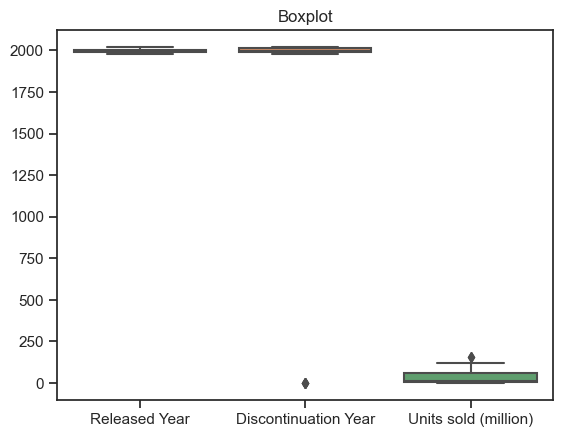

Interquartile Range (IQR):
Released Year           17.000
Discontinuation Year    19.500
Units sold (million)    57.005
dtype: float64

Variance:
Released Year              153.216471
Discontinuation Year    295563.280784
Units sold (million)      1815.513614
dtype: float64

Standard Deviation:
Released Year            12.378064
Discontinuation Year    543.657319
Units sold (million)     42.608844
dtype: float64


In [856]:
q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1

variance = df.var(numeric_only=True)

standard_deviation = df.std(numeric_only=True)

sns.boxplot(data=df)
plt.title('Boxplot')
plt.show()

print('Interquartile Range (IQR):')
print(iqr)
print('\nVariance:')
print(variance)
print('\nStandard Deviation:')
print(standard_deviation)

<h4>Distribution analysis*<h4>

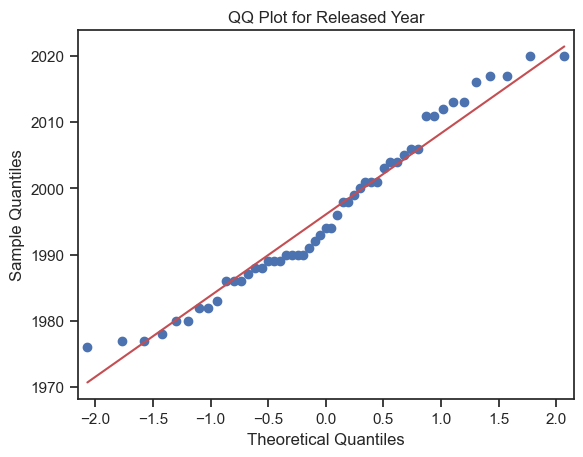

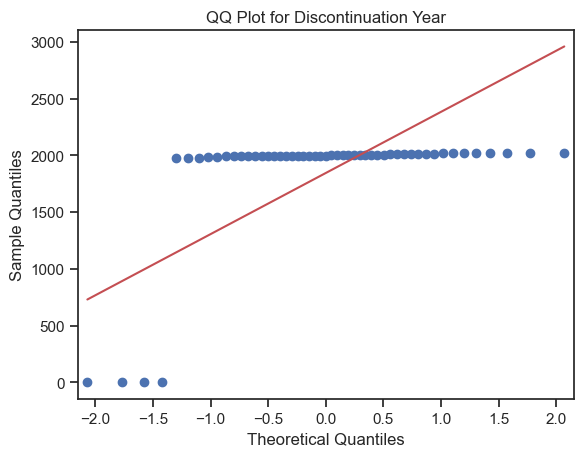

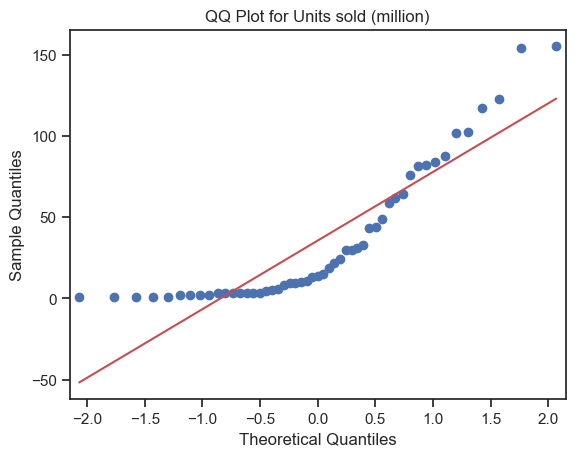

In [857]:
numerical_columns = df.select_dtypes(include='number').columns

for column in numerical_columns:
    sm.qqplot(df[column], line='s')
    plt.title(f'QQ Plot for {column}')
    plt.show()


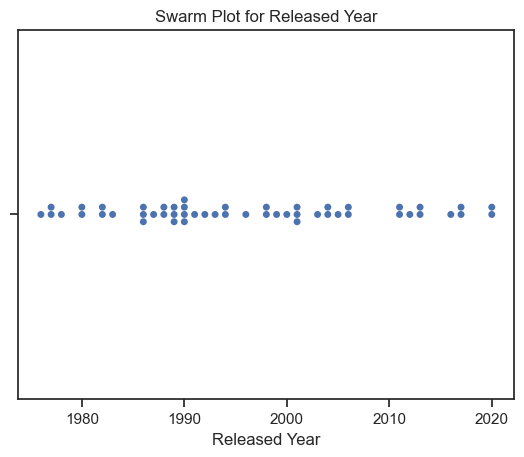

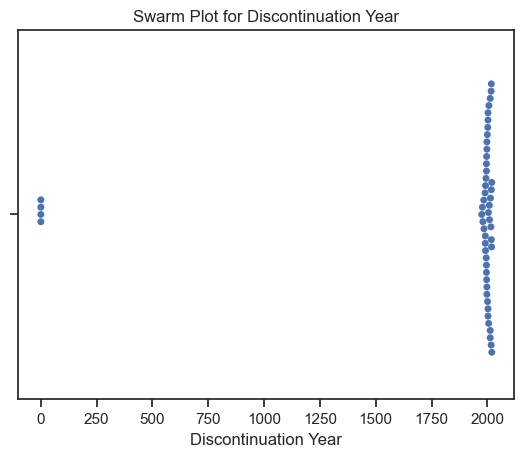

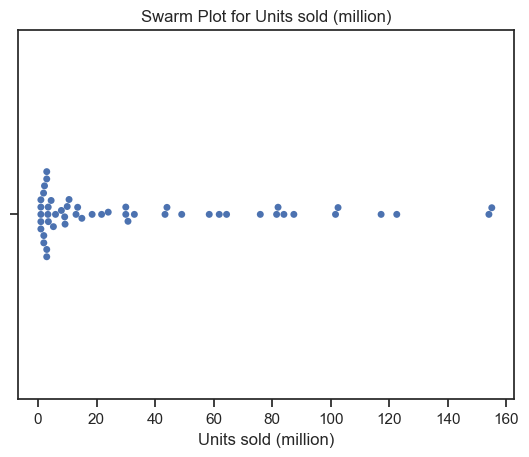

In [858]:
for column in numerical_columns:
    sns.swarmplot(x=column, data=df)
    plt.title(f'Swarm Plot for {column}')
    plt.show()

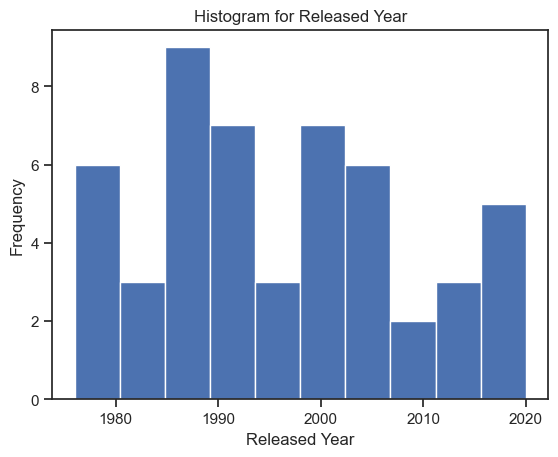

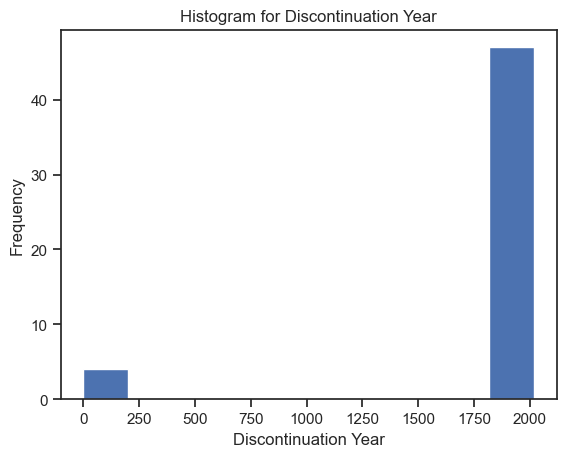

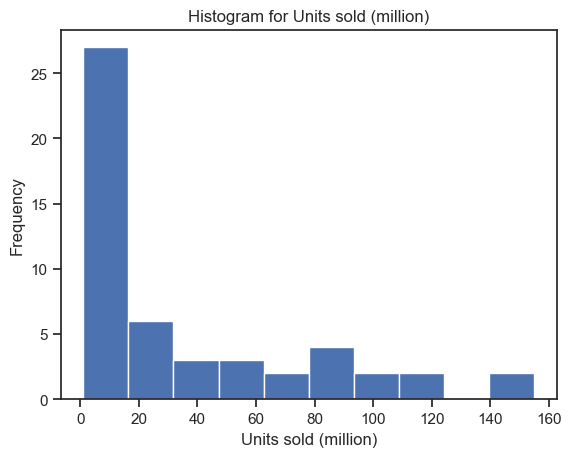

In [859]:
for column in numerical_columns:
    plt.hist(df[column], bins=10)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {column}')
    plt.show()

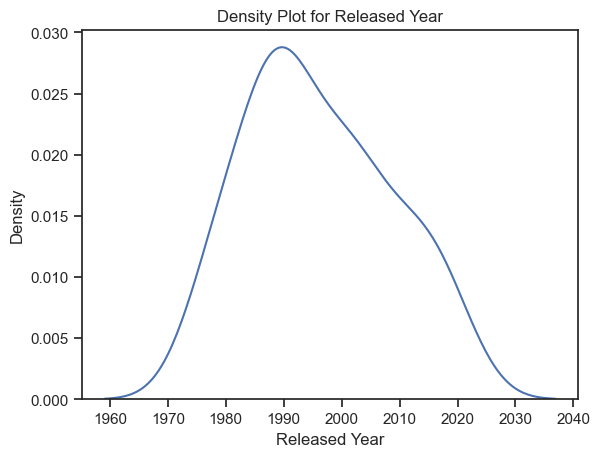

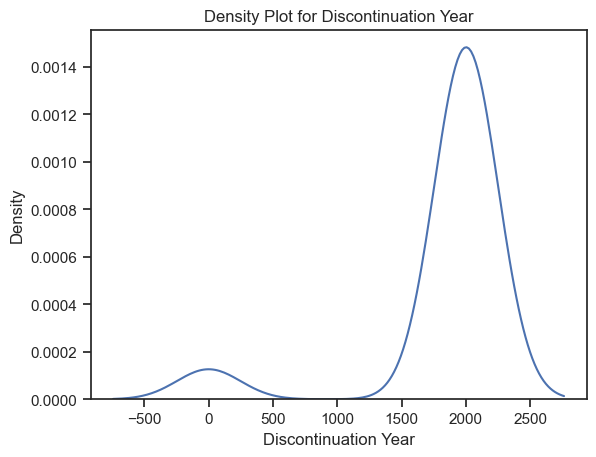

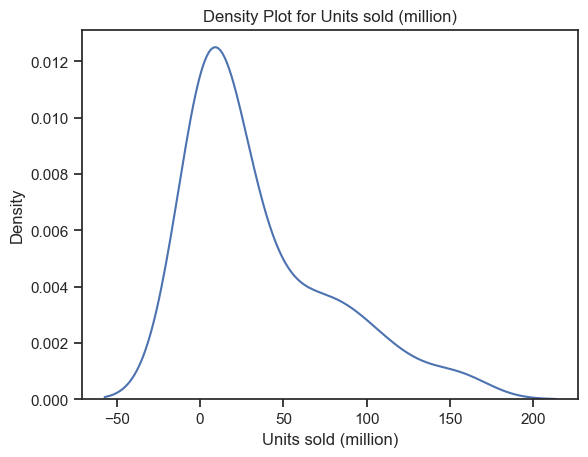

In [860]:
for column in numerical_columns:
    sns.kdeplot(df[column])
    plt.xlabel(column)
    plt.ylabel('Density')
    plt.title(f'Density Plot for {column}')
    plt.show()

<h4>Statisticals tests for gaussianity/normal variable for numerical variables*<h4>

In [861]:
for column in numerical_columns:
    data = df[column]
    _, ks_pvalue = kstest(data, 'norm')
    _, dagostino_pvalue = normaltest(data)
    _, shapiro_pvalue = shapiro(data)
    _, jb_pvalue = jarque_bera(data)

    print(f"Statistical tests for {column}:")
    print("Kolmogorov-Smirnov test p-value:", ks_pvalue)
    print("D'Agostino's K-squared test p-value:", dagostino_pvalue)
    print("Shapiro-Wilk test p-value:", shapiro_pvalue)
    print("Jarque-Bera test p-value:", jb_pvalue)
    print()

Statistical tests for Released Year:
Kolmogorov-Smirnov test p-value: 0.0
D'Agostino's K-squared test p-value: 0.09433311747813027
Shapiro-Wilk test p-value: 0.06891652941703796
Jarque-Bera test p-value: 0.2833069616767865

Statistical tests for Discontinuation Year:
Kolmogorov-Smirnov test p-value: 8.320663010335954e-57
D'Agostino's K-squared test p-value: 1.3350780781798035e-12
Shapiro-Wilk test p-value: 5.032300666668946e-14
Jarque-Bera test p-value: 0.0

Statistical tests for Units sold (million):
Kolmogorov-Smirnov test p-value: 2.2748180433237855e-46
D'Agostino's K-squared test p-value: 0.0010300030378358235
Shapiro-Wilk test p-value: 4.960537012266286e-07
Jarque-Bera test p-value: 0.0005486040823741156



<h4>Bivariate data anaylsis for numerical to numerical*<h4>

In [862]:
correlation_matrix = df[numerical_columns].corr()
print(correlation_matrix)

                      Released Year  Discontinuation Year  \
Released Year              1.000000             -0.493758   
Discontinuation Year      -0.493758              1.000000   
Units sold (million)       0.391941             -0.242645   

                      Units sold (million)  
Released Year                     0.391941  
Discontinuation Year             -0.242645  
Units sold (million)              1.000000  


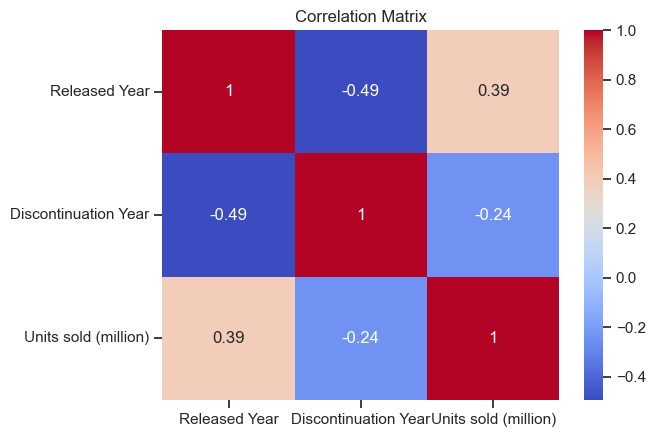

In [863]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

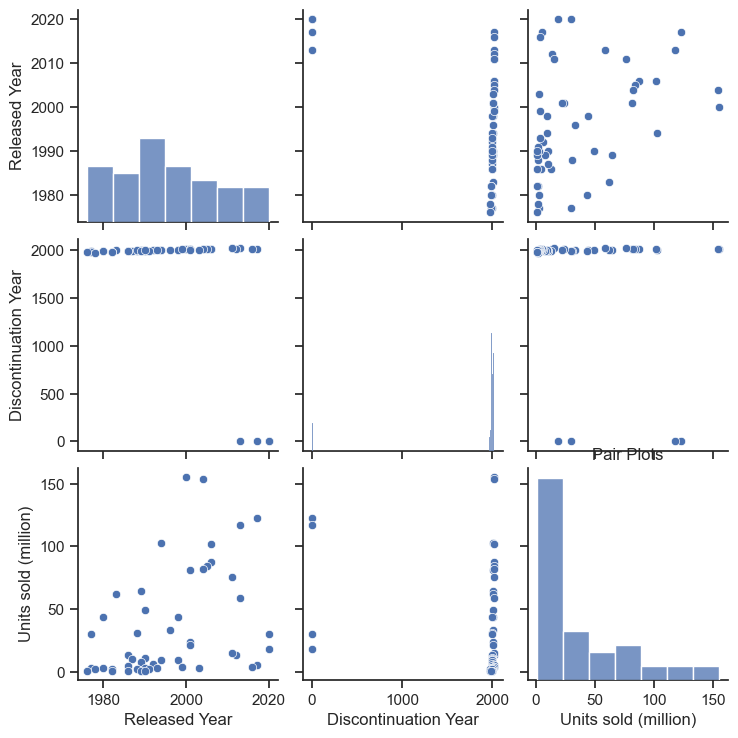

In [864]:
sns.pairplot(df[numerical_columns])
plt.title("Pair Plots")
plt.show()

In [865]:
for column in numerical_columns:
    stat, p = shapiro(df[column])
    print(f"Shapiro-Wilk test for {column}:")
    print(f"Statistics={stat:.4f}, p-value={p:.4f}")


for column1 in numerical_columns:
    for column2 in numerical_columns:
        correlation, p_value = pearsonr(df[column1], df[column2])
        print(f"Pearson correlation between {column1} and {column2}:")
        print(f"Correlation={correlation:.4f}, p-value={p_value:.4f}")

Shapiro-Wilk test for Released Year:
Statistics=0.9581, p-value=0.0689
Shapiro-Wilk test for Discontinuation Year:
Statistics=0.3174, p-value=0.0000
Shapiro-Wilk test for Units sold (million):
Statistics=0.7929, p-value=0.0000
Pearson correlation between Released Year and Released Year:
Correlation=1.0000, p-value=0.0000
Pearson correlation between Released Year and Discontinuation Year:
Correlation=-0.4938, p-value=0.0002
Pearson correlation between Released Year and Units sold (million):
Correlation=0.3919, p-value=0.0044
Pearson correlation between Discontinuation Year and Released Year:
Correlation=-0.4938, p-value=0.0002
Pearson correlation between Discontinuation Year and Discontinuation Year:
Correlation=1.0000, p-value=0.0000
Pearson correlation between Discontinuation Year and Units sold (million):
Correlation=-0.2426, p-value=0.0862
Pearson correlation between Units sold (million) and Released Year:
Correlation=0.3919, p-value=0.0044
Pearson correlation between Units sold (mi

<h4>Bivariate data anaylsis for cateogiral to categorial*<h4>

In [866]:
contingency_table = pd.crosstab(df['Console Name'], df['Type'], df["Company"], aggfunc=np.count_nonzero)

chi2, p_value, dof, expected = chi2_contingency(contingency_table)

n = np.sum(contingency_table)
phi2 = chi2 / n
r, k = contingency_table.shape
cramer_v = np.sqrt(phi2 / min((r - 1), (k - 1)))

print("Chi-square statistic:", chi2)
print("p-value:", p_value)
print("Degrees of freedom:", dof)
print("Cramer's V statistic:", cramer_v)

Chi-square statistic: nan
p-value: nan
Degrees of freedom: 200
Cramer's V statistic: Type
Dedicated             NaN
Handheld              NaN
Home                  NaN
Home console add-on   NaN
Hybrid                NaN
dtype: float64


KeyError: 'Category'